# **J.JENISHA  (212222230056)**


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

# Train dataset


In [46]:
dataset_train = pd.read_csv('trainset.csv')

In [47]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [48]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [49]:
train_set = dataset_train.iloc[:,1:2].values  #[:,1:2] -> : = for row and 1:2 = for col

In [50]:
train_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [51]:
type(train_set)

numpy.ndarray

In [52]:
train_set.shape

(1259, 1)

In [53]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [54]:
training_set_scaled.shape

(1259, 1)

In [55]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [56]:
X_train.shape

(1199, 60)

In [57]:
length = 60
n_features = 1

In [58]:
model = Sequential([
    SimpleRNN(50, input_shape = (length, n_features)),
    Dense(1)
])

In [59]:
model.compile(optimizer='adam',loss='mse')

In [60]:
print("J.JENISHA \n212222230056")
model.summary()

J.JENISHA 
212222230056
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.fit(X_train1,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 2s 12ms/step - loss: 0.0083
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 7.6160e-04
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 7.6733e-04
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 6.2558e-04
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 6.4270e-04
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 6.5489e-04
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 5.6474e-04
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 5.7445e-04
Epoch 10/100
38/38 [==============================] - 0s 12ms/step - loss: 6.1023e-04
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 5.3887e-04
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - lo

In [62]:
print("J.JENISHA \n212222230056")
model.summary()

J.JENISHA 
212222230056
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Test dataset


In [63]:
dataset_test = pd.read_csv('testset.csv')

In [64]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [65]:
test_set = dataset_test.iloc[:,1:2].values

In [66]:
test_set

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [67]:
test_set.shape

(125, 1)

In [68]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [69]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [70]:
X_test.shape

(1324, 60, 1)

In [71]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 1s 7ms/step


Name: J.JENISHA 
Register Number: 212222230056    


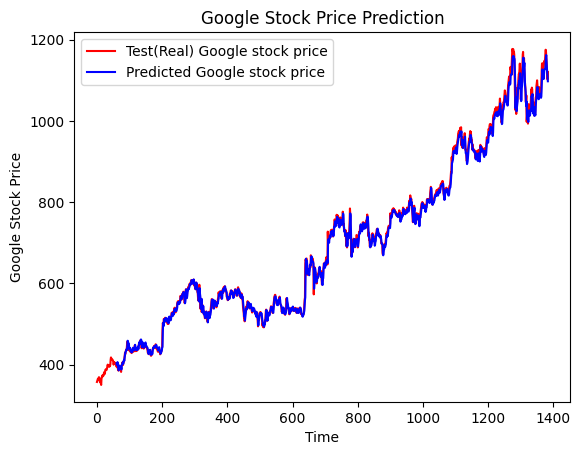

In [72]:
print("Name: J.JENISHA \nRegister Number: 212222230056    ")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()